In [25]:
# library(tidyverse)
# library(repr)
# #library(readxl)
# library(tidymodels)
# #library(ggplot2)
# #install.packages("ggplot2")

library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
options(repr.matrix.max.rows = 6)
install.packages("ggplot2")
install.packages("GGally")
library(ggplot2)
library(GGally)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Introduction

Chest pain, also known as angina, is characterized by blockages in the blood vessels leading to one’s heart. Four types of these chest pains include typical angina, atypical angina, non-anginal pain and asymptomatic. Typical angina is a substernal chest pain caused by physical exertion while atypical angina is distinguished as epigastric pain (AlBadri et.al., 2017). In addition, non-anginal pain is not attributed to an underlying heart disease and asymptomatic chest pain is a temporary change in blood flow to the heart without typical chest pain (Rahel et.al., 2018). Whilst different, they show overlapping symptoms, such as shortness of breath and intense pain that makes it difficult to distinguish between them. Many studies have shown that age, unhealthy eating patterns, stress and more are all accompanied by a greater risk of experiencing angina (“Causes and Risk Factors”). 

Question: What type of chest pain is most likely to occur based on their age, resting blood sugar, maximum heart rate and presence of heart disease?


In [47]:
#Reading data into notebook 

hungry <- read.csv("data/processed.hungarian.data", header = FALSE)
hungry

#Assigning column names
colnames(hungry) <- c("age", 'sex', 'chest_pain_type', 'resting_bps', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate', 'excercise_angina', 'depression', 'slope', 'major_vessels', 'thal', 'heart_disease')

#removing missing values 
hungry[hungry == "?"] <- NA

hungry_no_NA <- hungry |>
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    na.omit()
hungry_no_NA

#Changing the variables into integers
hungry_select <- hungry_no_NA |>
     mutate( resting_bps = as.integer(resting_bps),cholestoral = as.integer(cholestoral), max_heartrate = as.integer(max_heartrate))
hungry_select

#Splitting the data sets into training and testing 
hungry_split <- initial_split(hungry, prop = 3/4, strata = chest_pain_type)
hungry_training <- training(hungry_split)
hungry_testing <- testing(hungry_split)

#Determing the number of rows have missing values
hungry_na <- hungry_training |> 
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    is.na()|>
    nrow()
hungry_na

#Group and Summarize the chest_pain_type
hungry_group <- hungry_training |>
    group_by(chest_pain_type) |>
    summarize(n=n())
hungry_group

#Determing the means of each predicators' columns
hungry_mean <- hungry_select|> 
        map_df(mean, na.rm = TRUE)
hungry_mean



age,sex,chest_pain_type,resting_bps,cholestoral,fasting_blood_sugar,rest_ecg,max_heartrate,excercise_angina,depression,slope,major_vessels,thal,heart_disease
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


,age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease
,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,28,2,130,132,185,0
2,29,2,120,243,160,0
4,30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
292,56,4,155,342,150,1
293,58,2,180,393,110,1
294,65,4,130,275,115,1


,age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease
,<int>,<int>,<int>,<int>,<int>,<int>
1,28,2,130,132,185,0
2,29,2,120,243,160,0
4,30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
292,56,4,155,342,150,1
293,58,2,180,393,110,1
294,65,4,130,275,115,1


[1] 220

chest_pain_type,n
<int>,<int>
1,9
2,80
3,39
4,92


age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47.77778,2.996296,132.4889,250.637,139.1556,0.3740741


In the heart disease dataset we have opted not to utilize sex, fasting blood sugar, resting electrocardiographic results, exercise-induced angina, depression, and thalassemia lack as they lack direct relevance in predicting the type of chest pain. Fasting blood sugar levels reflect metabolic state, but their direct link to specific types of chest pain in heart disease is unclear. Resting electrocardiographic results provides insights into heart function but does not directly correlate with the qualitative aspects of chest pain. Exercise-induced angina, depression, sex and thalassemia do not directly predict the type of chest pain associated as they lack direct physiological links to cardiac symptoms.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


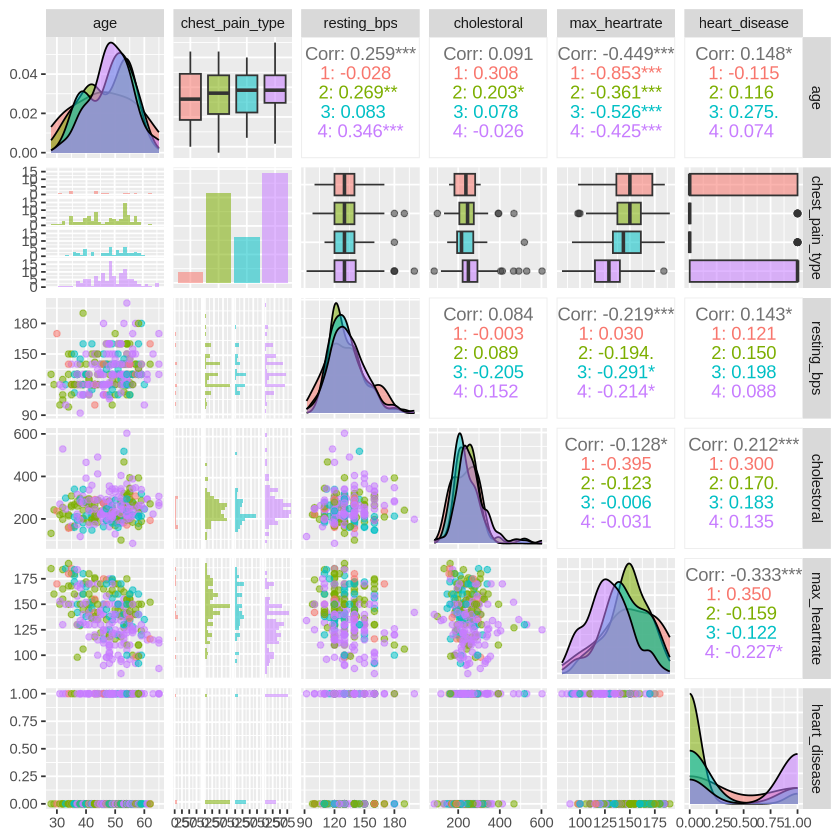

In [48]:
#Detemining the correlation between predictors 

data_ggpair <- hungry_select |>
                    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease)

data_ggpair$chest_pain_type = as.factor(data_ggpair$chest_pain_type)

plot <- ggpairs(data_ggpair, aes(color = chest_pain_type, alpha = 0.5))

plot

If we take a look a closer look at the ggpair graphs we notice interesting correlation with the predictors max heart rate, resting bps, age and cholesterol. For instance, from the histograms we can notice correlations between these predictors and chest pain type where certain predictors are more prominent in types 4 and types 3 and not as common in types 1 and 2. Thus, based on these correlations it would be beneficial to further investigate the role these 4 predictors play on chest pain types by building a knn classification model.


Expected outcomes/significance:

What do you expect to find
?
Predicting chest pain types in heart disease patients could lead to better diagnosis and care, as well as more targeted interventions and improved long-term outcomes. It may also uncover new insights into the mechanisms behind chest pain, aiding in the discovery of therapeutic targets and predictive markers. 


What impact could such findings 
have?
The findings from predicting chest pain types can lead to more personalized and effective care strategies, benefiting patients across diverse demographics, including those who are non-verbal by optimizing treatment approaches.


What future questions could this
 lead to?
Understanding how different types of chest pain correlate with specific heart conditions can lead to insights into the underlying mechanisms of various cardiac diseases. Further investigation could focus on developing targeted interventions based on the type of chest pain observed in individual ients. 


